<a href="https://colab.research.google.com/github/Vinicius-DataAnalyst/portfolio/blob/main/11_Proj_ClusteringGeoloc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.3. Atividade 2

Existe ainda muita dúvida sobre a quantidade de centros de distribuição que precisarão ser construídos.

Seu time recebeu da logística uma amostra com características dos locais onde houve falha na entrega.

A base da logística possui os seguintes campos:

Latitude;
Longitude;
Valor da entrega para aquela geolocalização.
Utilize alguma técnica de análise de conglomerado para determinar quantos centros de distribuição poderiam ser construídos.

Para isso, siga os seguintes passos:

Trate a sua base de dados, mas considere que os dados de longitude e latitude não são reais, isto é, utilize-os somente para determinar a aproximação dos pontos;
Para cada grupo formado, determine o valor total das entregas que seriam atendidas por aquele centro, de acordo com a base recebida;
Explique sucintamente qual foi o algoritmo de clusterização escolhido e o porquê.


Carregando os dados

**Reasoning**:
Load the data into a pandas DataFrame and display its head and info to understand its structure and data types.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Fiap On - Fase 6 - Geolocalização Dataset - Asset.csv')
display(df.head())
display(df.info())

,latitude,longitude,price
0,"-21,591360","-51,066690","52,47"
1,"-21,285350","-49,654970","37,03"
2,"-22,025900","-47,067020","71,50"
3,"-21,916230","-46,686660","88,27"
4,"-22,476390","-46,632780","36,16"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   latitude   653 non-null    object
 1   longitude  653 non-null    object
 2   price      653 non-null    object
dtypes: object(3)
memory usage: 15.4+ KB


None

## Pré-processamento dos dados

- Renomeando a coluna "Price" para "Valor da entrega"

- Tratando a vírgula como separador decimal na coluna "Valor da entrega"

- Preparando os dados de Latitude e Longitude para clusterização, considerando que não são coordenadas geográficas reais, mas representam proximidade.


In [15]:
df = df.rename(columns={'price': 'Valor da entrega'})
df['Valor da entrega'] = df['Valor da entrega'].astype(str).str.replace(',', '.').astype(float)
df['latitude'] = df['latitude'].astype(str).str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].astype(str).str.replace(',', '.').astype(float)

clustering_data = df[['latitude', 'longitude']]

display(df.head())
display(df.info())
display(clustering_data.head())

,latitude,longitude,Valor da entrega,cluster
0,-21.59136,-51.06669,52.47,1
1,-21.28535,-49.65497,37.03,1
2,-22.02590,-47.06702,71.50,0
3,-21.91623,-46.68666,88.27,0
4,-22.47639,-46.63278,36.16,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          653 non-null    float64
 1   longitude         653 non-null    float64
 2   Valor da entrega  653 non-null    float64
 3   cluster           653 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 18.0 KB


None

,latitude,longitude
0,-21.59136,-51.06669
1,-21.28535,-49.65497
2,-22.02590,-47.06702
3,-21.91623,-46.68666
4,-22.47639,-46.63278


## Determinando o número ideal de clusters

Utilizar o método do cotovelo para encontrar o número ideal de clusters para os dados com base na Latitude e Longitude.


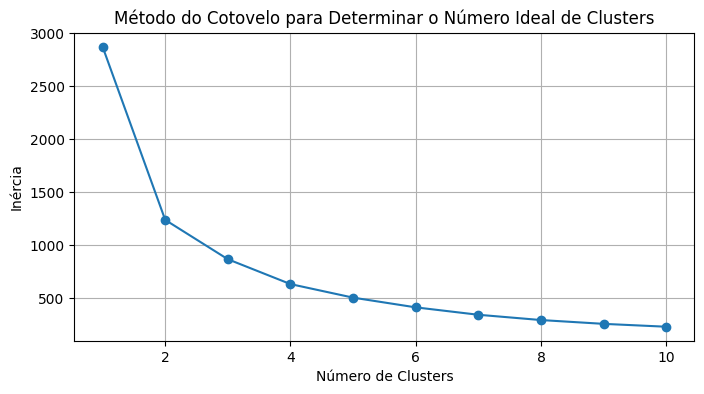

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.grid(True)
plt.show()

Entendimento:
Aparentemente o número ideal de clusters está entre 3 e 4. Então vamos escolher 4 como algo que estrategicamente não é o mínimo que seria de 3 mas também não aumenta muito o custo com infraestrutura sem de fato ter um amparo estatístico que justifique de fato a criação de mais clusters desnecessariamente. ENtão 4 vem a ser a melhor apção.



In [16]:
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state=42, n_init=10) # adicionado n_init
df['cluster'] = kmeans.fit_predict(clustering_data)

display(df.head())

,latitude,longitude,Valor da entrega,cluster
0,-21.59136,-51.06669,52.47,1
1,-21.28535,-49.65497,37.03,1
2,-22.02590,-47.06702,71.50,0
3,-21.91623,-46.68666,88.27,0
4,-22.47639,-46.63278,36.16,0


## Analisando os clusters com base na soma do valor das entregas

Para cada cluster, calcular o "Valor total das entregas" para entender o valor potencial atendido por um centro de distribuição naquele cluster.


In [11]:
cluster_delivery_value = df.groupby('cluster')['Valor da entrega'].sum()
display(cluster_delivery_value)

,Valor da entrega
cluster,
0,11067.97
1,12838.25
2,7837.20
3,9440.39


## Explicar o algoritmo

### Subtask:
Explicar brevemente o algoritmo de clusterização escolhido e o motivo da seleção.


## Explicação do Algoritmo K-Means:
O K-Means é um algoritmo de clusterização não supervisionada que agrupa dados em K grupos distintos (clusters), onde K é um número predefinido.

Ele funciona iterativamente, atribuindo cada ponto de dado ao cluster cujo centro (ou centróide) é o mais próximo. Após a atribuição, o centróide de cada cluster é recalculado como a média dos pontos pertencentes a ele.

Este processo se repete até que os centróides não se movam significativamente ou um número máximo de iterações seja atingido. O objetivo é minimizar a inércia (também conhecida como soma dos quadrados dentro do cluster), que é a soma das distâncias quadradas de cada ponto para o centróide do seu cluster.


##Motivo da Escolha do K-Means:

O K-Means foi escolhido para esta tarefa por sua simplicidade e eficiência em agrupar dados baseados em sua proximidade espacial.

Dado que os dados de latitude e longitude (mesmo que não sejam coordenadas geográficas reais, mas representem proximidade) precisam ser agrupados para identificar locais potenciais para centros de distribuição, o K-Means é uma escolha natural.

Ele particiona os dados de forma a minimizar a variância dentro de cada cluster, o que é ideal para identificar aglomerados de pontos de entrega próximos. Além disso, sua interpretação é direta: cada cluster representa uma área potencial de atendimento para um centro de distribuição, e o centróide do cluster pode ser considerado uma localização representativa para esse centro.

## Apresentação de resultados

### Resumo dos resultados, incluindo o número ideal de clusters e o valor total das entregas para cada cluster.

In [13]:
print(f"Com base na análise, o número determinado de clusters é: {n_clusters}")
print("\nValor total das entregas por cluster:")
display(cluster_delivery_value)

print("\nInterpretação dos Resultados:")
print(f"A análise de clusterização com {n_clusters} clusters nos dados de Latitude e Longitude sugere {n_clusters} áreas potenciais para a construção de centros de distribuição. O DataFrame acima mostra o valor total das entregas associado a cada um desses clusters. Esses valores totais são cruciais para a tomada de decisão logística, pois indicam o volume de negócio potencial que cada centro de distribuição atenderia. Clusters com maior valor total de entregas podem justificar a construção de centros de distribuição maiores ou mais bem equipados, enquanto clusters com valores menores podem necessitar de centros menores ou estratégias de atendimento diferentes. Essa informação ajuda a priorizar locais e dimensionar adequadamente a infraestrutura logística para otimizar o atendimento e a eficiência.")

Com base na análise, o número determinado de clusters é: 4

Valor total das entregas por cluster:


,Valor da entrega
cluster,
0,11067.97
1,12838.25
2,7837.20
3,9440.39



Interpretação dos Resultados:
A análise de clusterização com 4 clusters nos dados de Latitude e Longitude sugere 4 áreas potenciais para a construção de centros de distribuição. O DataFrame acima mostra o valor total das entregas associado a cada um desses clusters. Esses valores totais são cruciais para a tomada de decisão logística, pois indicam o volume de negócio potencial que cada centro de distribuição atenderia. Clusters com maior valor total de entregas podem justificar a construção de centros de distribuição maiores ou mais bem equipados, enquanto clusters com valores menores podem necessitar de centros menores ou estratégias de atendimento diferentes. Essa informação ajuda a priorizar locais e dimensionar adequadamente a infraestrutura logística para otimizar o atendimento e a eficiência.


Interpretação dos resultados:

A análise de clusterização com 4 clusters nos dados de Latitude e Longitude sugere 4 áreas potenciais para a construção de centros de distribuição.

O DataFrame acima mostra o valor total das entregas associado a cada um desses clusters.

Esses valores totais são cruciais para a tomada de decisão logística, pois indicam o volume de negócio potencial que cada centro de distribuição atenderia.

Clusters com maior valor total de entregas podem justificar a construção de centros de distribuição maiores ou mais bem equipados, enquanto clusters com valores menores podem necessitar de centros menores ou estratégias de atendimento diferentes.

Essa informação ajuda a priorizar locais e dimensionar adequadamente a infraestrutura logística para otimizar o atendimento e a eficiência.

## Resumo:

### Principais Resultados da Análise de Dados

* A coluna 'Price' foi renomeada para 'Valor da entrega' e, juntamente com 'Latitude' e 'Longitude', convertida para tipos numéricos, tratando a vírgula como separador decimal.
* O método do cotovelo aplicado aos dados de 'Latitude' e 'Longitude' sugeriu que 3 ou 4 clusters poderiam ser um número razoável de clusters, sendo 4 o número escolhido para a análise.
* Utilizando a clusterização K-Means com 4 clusters, os pontos de dados foram agrupados, e cada ponto recebeu um ID de cluster.
* O valor total das entregas ('Valor da entrega') foi calculado para cada um dos quatro clusters:
  * Cluster 0: \$11067.97
  * Cluster 1: \$12838.25
  * Cluster 2: \$7837.20
  * Cluster 3: \$9440.39

### Insights ou Próximos Passos

* A análise de clusterização fornece uma base orientada por dados para determinar áreas de serviço potenciais para centros de distribuição. Clusters com valores totais de entrega mais altos (por exemplo, Cluster 1) representam áreas com maior demanda potencial, o que pode influenciar as decisões sobre o tamanho, localização e investimento em centros de distribuição.
* Análises adicionais poderiam envolver a visualização dos clusters em uma representação semelhante a um mapa (usando a Latitude e Longitude como coordenadas) para entender sua distribuição geográfica e proximidade com a infraestrutura existente ou rotas principais.